In [2]:
suppressPackageStartupMessages(library(extraDistr))
suppressPackageStartupMessages(library(distr))
source("./simple.R")
source("./simple_utils.R")
set.seed(2024)

### Q1

In [11]:
success_indicators = c(1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1)

In [29]:
# (1)
logistic_regression = function() {
  n = length(success_indicators)
  intercept = simulate(Norm(0, 1))
  slope = simulate(Norm(0, 1))
  thetas = plogis(intercept + slope * (1:n))
  for (i in (1:n)) {
    observe(success_indicators[i], Bern(thetas[i]))
  }
  next_theta = intercept + slope * (n + 1)
  pred = ifelse(next_theta >= 1 / 2, 1, 0)
  return (c(intercept, slope, pred))

  # return (list(intercept = intercept, slope = slope, prediction = pred))
}

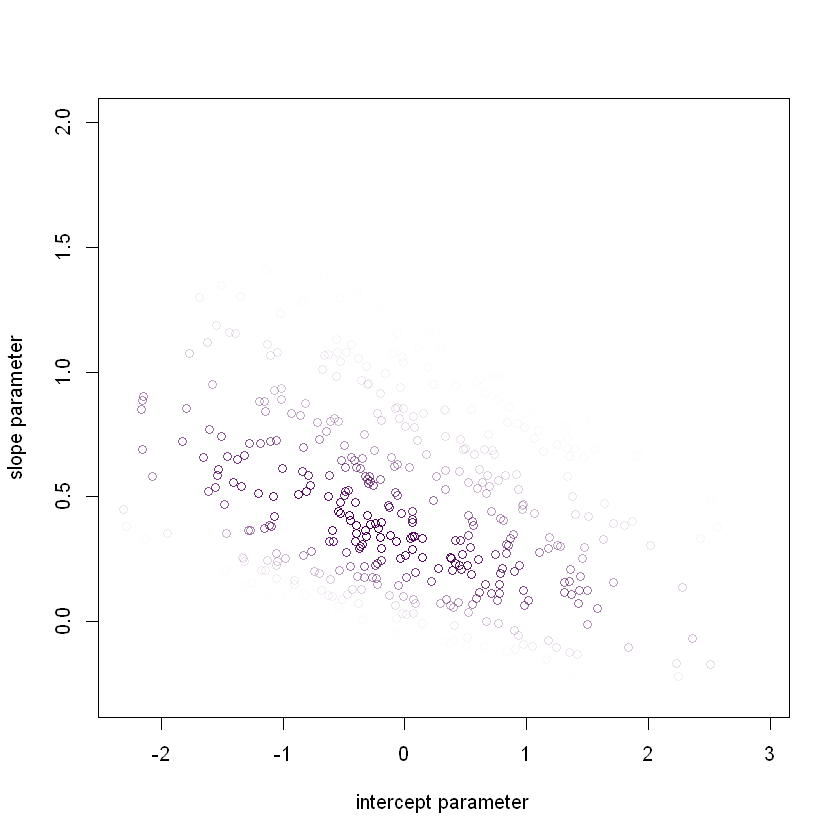

In [30]:
# (2)
posterior = posterior_particles(logistic_regression, 1000)
weighted_scatter_plot(posterior, plot_options = list(xlab="intercept parameter", ylab="slope parameter"))


In [7]:
# (3)


[1] 0.7590194


### Q2